# Sparse Matrix

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `SparseMatrix`
Block encoding of a sparse-access matrix.

Given row, column, and entry oracles $O_r$, $O_c$, and $O_A$ for an $s$-sparse matrix
$A \in \mathbb{C}^{2^n \times 2^n}$, i.e. one where each row / column has exactly $s$ non-zero
entries, computes a $(s, n+1, \epsilon)$-block encoding of $A$ as follows:
```
       ┌────┐                       ┌────┐
  |0> ─┤    ├─     |0> ─────────────┤    ├───────────────
       │    │           ┌──┐        │    │          ┌──┐
       │ U  │  =        │ n│ ┌────┐ │ O  │   ┌────┐ │ n│
|0^n> ─┤  A ├─   |0^n> ─┤H ├─┤    ├─┤  A ├─X─┤    ├─┤H ├─
       │    │           └──┘ │ O  │ │    │ │ │ O* │ └──┘
|Psi> ─┤    ├─   |Psi> ──────┤  c ├─┤    ├─X─┤  r ├──────
       └────┘                └────┘ └────┘   └────┘
```

To encode a matrix of irregular dimension, the matrix should first be embedded into one of
dimension $2^n \times 2^n$ for suitable $n$.
To encode a matrix where each row / column has at most $s$ non-zero entries, some zeroes should
be treated as if they were non-zero so that each row / column has exactly $s$ non-zero entries.

#### Parameters
 - `row_oracle`: The row oracle $O_r$. See `RowColumnOracle` for definition.
 - `col_oracle`: The column oracle $O_c$. See `RowColumnOracle` for definition.
 - `entry_oracle`: The entry oracle $O_A$. See `EntryOracle` for definition.
 - `eps`: The precision of the block encoding. 

#### Registers
 - `system`: The system register.
 - `ancilla`: The ancilla register.
 - `resource`: The resource register (present only if bitsize > 0). 

#### References
 - [Lecture Notes on Quantum Algorithms for Scientific Computation](https://arxiv.org/abs/2201.08309). Lin Lin (2022). Ch. 6.5.


In [2]:
from qualtran.bloqs.block_encoding import SparseMatrix

### Example Instances

In [3]:
from qualtran.bloqs.block_encoding.sparse_matrix import (
    TopLeftRowColumnOracle,
    UniformEntryOracle,
)

row_oracle = TopLeftRowColumnOracle(system_bitsize=2)
col_oracle = TopLeftRowColumnOracle(system_bitsize=2)
entry_oracle = UniformEntryOracle(system_bitsize=2, entry=0.3)
sparse_matrix_block_encoding = SparseMatrix(row_oracle, col_oracle, entry_oracle, eps=0)

In [4]:
from qualtran.bloqs.block_encoding.sparse_matrix import (
    TopLeftRowColumnOracle,
    UniformEntryOracle,
)

n = sympy.Symbol('n', positive=True, integer=True)
row_oracle = TopLeftRowColumnOracle(system_bitsize=n)
col_oracle = TopLeftRowColumnOracle(system_bitsize=n)
entry_oracle = UniformEntryOracle(system_bitsize=n, entry=0.3)
sparse_matrix_symb_block_encoding = SparseMatrix(row_oracle, col_oracle, entry_oracle, eps=0)

In [5]:
from qualtran.bloqs.block_encoding.sparse_matrix import (
    ExplicitEntryOracle,
    TopLeftRowColumnOracle,
)

data = np.array([[0.0, 0.25], [1 / 3, 0.467]])
row_oracle = TopLeftRowColumnOracle(system_bitsize=1)
col_oracle = TopLeftRowColumnOracle(system_bitsize=1)
entry_oracle = ExplicitEntryOracle(system_bitsize=1, data=data, entry_bitsize=10)
explicit_matrix_block_encoding = SparseMatrix(row_oracle, col_oracle, entry_oracle, eps=0)

In [6]:
from qualtran.bloqs.block_encoding.sparse_matrix import SymmetricBandedRowColumnOracle

row_oracle = SymmetricBandedRowColumnOracle(3, bandsize=1)
col_oracle = SymmetricBandedRowColumnOracle(3, bandsize=1)
entry_oracle = UniformEntryOracle(3, entry=0.3)
symmetric_banded_matrix_block_encoding = SparseMatrix(
    row_oracle, col_oracle, entry_oracle, eps=0
)

#### Graphical Signature

In [7]:
from qualtran.drawing import show_bloqs
show_bloqs([sparse_matrix_block_encoding, sparse_matrix_symb_block_encoding, explicit_matrix_block_encoding, symmetric_banded_matrix_block_encoding],
           ['`sparse_matrix_block_encoding`', '`sparse_matrix_symb_block_encoding`', '`explicit_matrix_block_encoding`', '`symmetric_banded_matrix_block_encoding`'])

### Call Graph

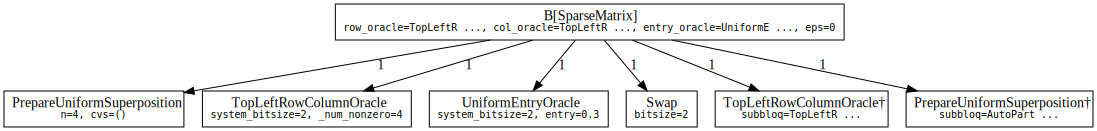

#### Counts totals:
 - `Adjoint(subbloq=PrepareUniformSuperposition)`: 1
 - `Adjoint(subbloq=TopLeftRowColumnOracle)`: 1
 - `PrepareUniformSuperposition`: 1
 - `Swap`: 1
 - `TopLeftRowColumnOracle`: 1
 - `UniformEntryOracle`: 1

In [8]:
from qualtran.resource_counting.generalizers import ignore_split_join
sparse_matrix_block_encoding_g, sparse_matrix_block_encoding_sigma = sparse_matrix_block_encoding.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(sparse_matrix_block_encoding_g)
show_counts_sigma(sparse_matrix_block_encoding_sigma)